# ***Prophet***

This notebook demonstrates the process of designing, training, and evaluating an Prophet model using the hourly energy load data.
We aim to forecast future energy load based on historical data.


### Import Libraries

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [1]:
# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows and data types of the dataset
data.head()


,Datetime,PJM_Load_MW
0,1998-12-31 01:00:00,29309.0
1,1998-12-31 02:00:00,28236.0
2,1998-12-31 03:00:00,27692.0
3,1998-12-31 04:00:00,27596.0
4,1998-12-31 05:00:00,27888.0


### Pre Processing

In [2]:
# Convert 'Datetime' to datetime data type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Rename the columns for Prophet
data.rename(columns={'Datetime': 'ds', 'PJM_Load_MW': 'y'}, inplace=True)

# Display the first few rows and data types to confirm changes
data.head()


,ds,y
0,1998-12-31 01:00:00,29309.0
1,1998-12-31 02:00:00,28236.0
2,1998-12-31 03:00:00,27692.0
3,1998-12-31 04:00:00,27596.0
4,1998-12-31 05:00:00,27888.0


In [3]:
data.dtypes


ds    datetime64[ns]
y            float64
dtype: object

### Model Training

In [4]:
# Initialize the Prophet model with multiplicative seasonality mode
model = Prophet(seasonality_mode='multiplicative')

# Add custom hourly seasonality
model.add_seasonality(name='hourly', period=1.0, fourier_order=5)

# Fit the model to the dataset
model.fit(data)



c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
21:40:54 - cmdstanpy - INFO - Chain [1] start processing
21:41:29 - cmdstanpy - INFO - Chain [1] done processing


c:\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcs

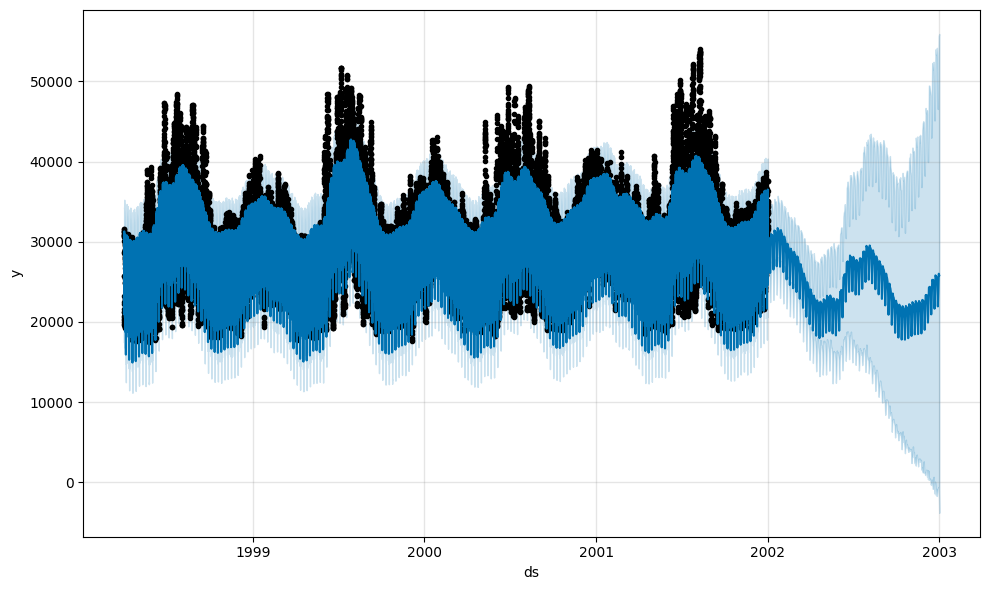

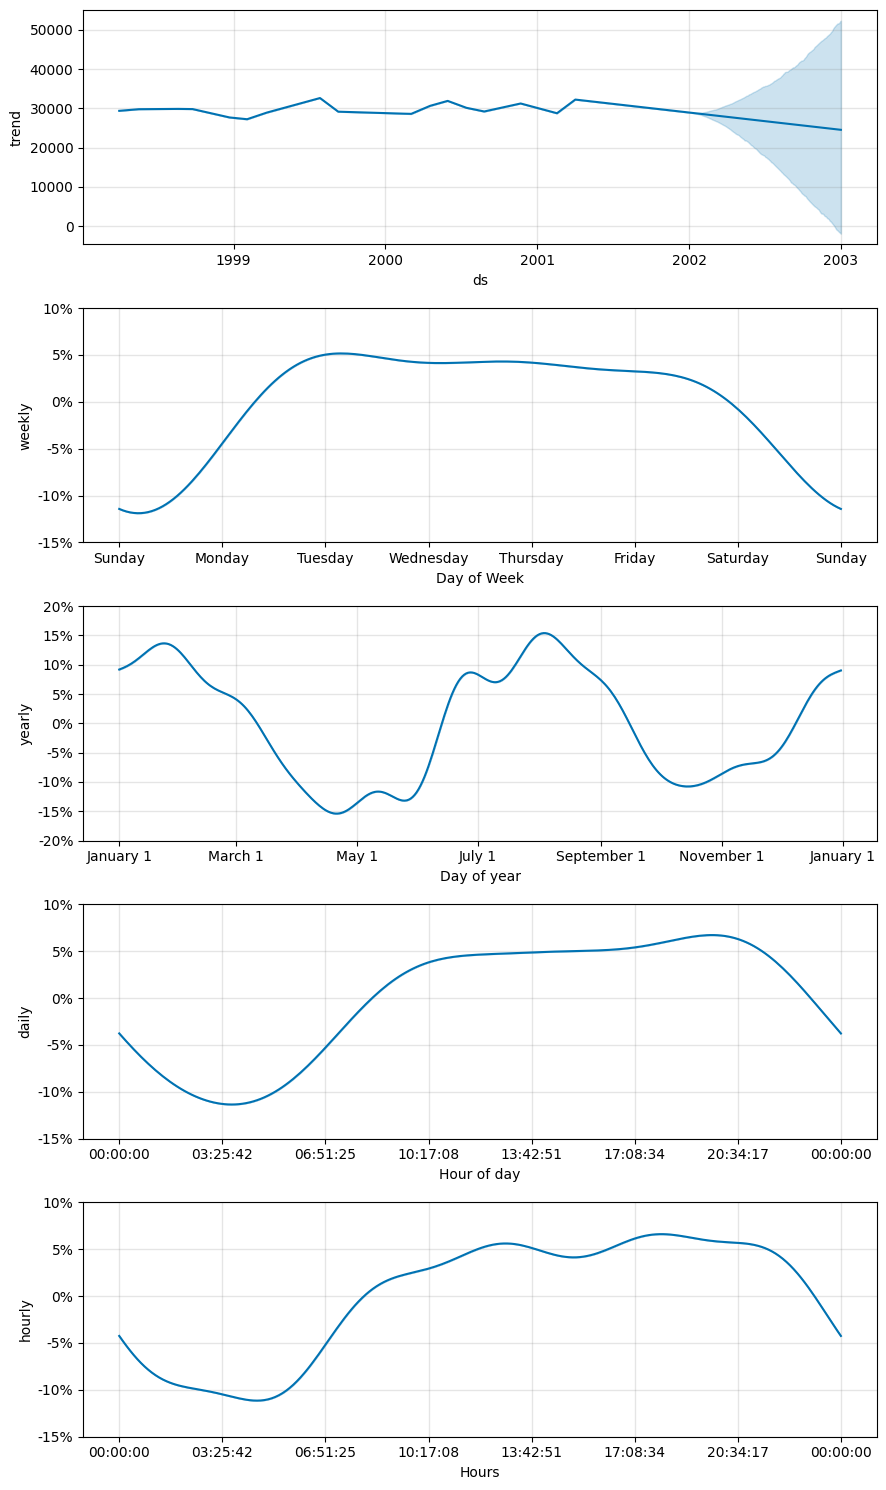

In [5]:
# Create future dates to forecast
future = model.make_future_dataframe(periods=365, freq='D')  # Forecast for the next year, daily frequency

# Predict future values
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

# Show plots if in a script
plt.show()

### Saving Model

In [6]:
import pickle
from prophet import Prophet

# Assuming 'model' is your trained Prophet model
# Save the model to a file
with open('Prophet.pkl', 'wb') as f:
    pickle.dump(model, f)


### Forecasting

In [7]:
import pickle
import pandas as pd
from prophet import Prophet

# Load the model from the file
with open('Prophet.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Create future dates to forecast (for example, next 365 days)
future = loaded_model.make_future_dataframe(periods=12, freq='H')

# Predict future values
forecast = loaded_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


c:\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


                       ds          yhat    yhat_lower    yhat_upper
32903 2002-01-01 08:00:00  32533.714032  28838.574147  36235.686093
32904 2002-01-01 09:00:00  34004.992059  30386.851141  37848.501023
32905 2002-01-01 10:00:00  34787.390755  31168.411625  38736.791428
32906 2002-01-01 11:00:00  35326.611438  31776.633570  39113.370838
32907 2002-01-01 12:00:00  35785.745450  31935.908837  39653.058551


### Evaluation Metrics

  0%|          | 0/2 [00:00<?, ?it/s]21:41:42 - cmdstanpy - INFO - Chain [1] start processing
21:41:53 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:14<00:14, 14.98s/it]21:41:57 - cmdstanpy - INFO - Chain [1] start processing
21:42:17 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 2/2 [00:39<00:00, 19.61s/it]


           horizon           mse         rmse          mae      mape  \
0 36 days 12:00:00  1.629076e+07  4036.180818  3433.037583  0.109969   
1 36 days 13:00:00  1.630550e+07  4038.006976  3436.838134  0.110066   
2 36 days 14:00:00  1.632693e+07  4040.659768  3441.405593  0.110178   
3 36 days 15:00:00  1.635426e+07  4044.040407  3446.292189  0.110294   
4 36 days 16:00:00  1.638422e+07  4047.742630  3451.034195  0.110400   

      mdape     smape  coverage  
0  0.098573  0.102569  0.577955  
1  0.098810  0.102664  0.577955  
2  0.099018  0.102777  0.577384  
3  0.099286  0.102893  0.576813  
4  0.099998  0.103000  0.575671  


c:\Python312\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Python312\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


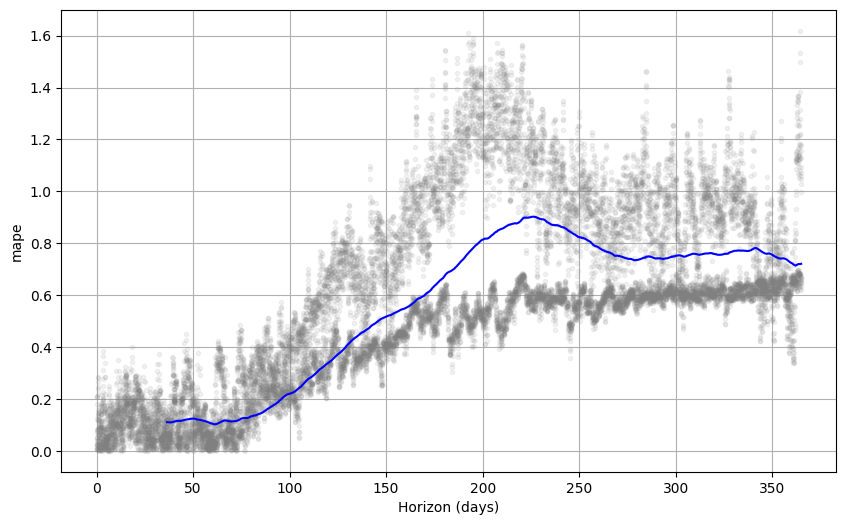

In [8]:
# Evaluaion metrics
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# Perform cross-validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Compute performance metrics
df_p = performance_metrics(df_cv)

# Display the performance metrics
print(df_p.head())


# Plot the performance metrics
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape')


